<a href="https://colab.research.google.com/github/Yayahajdar/spam-ham/blob/main/spam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import nltk
import random
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd



# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /home/yahya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/yahya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yahya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [121]:
df = pd.read_csv('data.csv',
         sep=',', header=None)
df = df.drop(0, axis=1)
df = df.drop(0, axis=0)
df

,1,2
1,ham,Go until wrong point crazy Available only in b...
2,ham,of lar Joking if u on
3,spam,Free entry in 2 a wily come to win FA Cup fina...
4,ham,U dun say so early for U c already then say
5,ham,Nah I don't think he goes to us he lives aroun...
...,...,...
5568,spam,This is the and time we have tried 2 contact u...
5569,ham,Will i b going to esplanade for home
5570,ham,Pity was in mood for that sonny other suggestions
5571,ham,The guy did some bitching but I acted like id ...


In [122]:
#Rename the name of columns
df.rename(columns = {1:'sit',2:'correct'}, inplace = True)
df

,sit,correct
1,ham,Go until wrong point crazy Available only in b...
2,ham,of lar Joking if u on
3,spam,Free entry in 2 a wily come to win FA Cup fina...
4,ham,U dun say so early for U c already then say
5,ham,Nah I don't think he goes to us he lives aroun...
...,...,...
5568,spam,This is the and time we have tried 2 contact u...
5569,ham,Will i b going to esplanade for home
5570,ham,Pity was in mood for that sonny other suggestions
5571,ham,The guy did some bitching but I acted like id ...


In [123]:
#separate classes
df_ham = df[df.sit=='ham']
df_spam = df[df.sit=='spam']

#convert to list

ham_list=df_ham['correct'].tolist()
spam_list= df_spam['correct'].tolist()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['correct'],  df['sit'], test_size=0.2, random_state=42)

In [124]:
# Preprocess the data (remove stopwords, lowercase, tokenize, stem, lemmatize)
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [125]:
# process for correction the words and sentences
def preprocess(text):
    words = word_tokenize(text)
    words = [ps.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

X_train = [preprocess(str(text)) for text in X_train]
X_test = [preprocess(str(text)) for text in X_test]

In [126]:
# Vectorize the data using CountVectorizer
count_vectorizer = CountVectorizer()
X_train_count_vectorized = count_vectorizer.fit_transform(X_train)
X_test_count_vectorized = count_vectorizer.transform(X_test)

In [127]:
# Vectorize the data using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf_vectorized = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf_vectorized = tfidf_vectorizer.transform(X_test)

In [128]:
# Train a ComplementNB  Naive Bayes classifier on Count Vectorized data
from sklearn.naive_bayes import ComplementNB

classifier_count = ComplementNB(force_alpha = True)
classifier_count.fit(X_train_count_vectorized, y_train)

ComplementNB(force_alpha=True)

In [129]:

# Make predictions on the test set (Count Vectorized)
predictions_count = classifier_count.predict(X_test_count_vectorized)

In [130]:

# Evaluate the accuracy (Count Vectorized)
accuracy_count = accuracy_score(y_test, predictions_count)
print("Accuracy (Count Vectorized):", accuracy_count)

Accuracy (Count Vectorized): 0.9479820627802691


In [184]:
model = MultinomialNB(force_alpha = True)
model.fit(X_train_count_vectorized, y_train)
predictions_model = model.predict(X_test_count_vectorized) 
# Evaluate the accuracy (Count Vectorized)
accuracy_model = accuracy_score(y_test, predictions_model)
print("Accuracy (model Vectorized):", accuracy_model)

Accuracy (model Vectorized): 0.9811659192825112


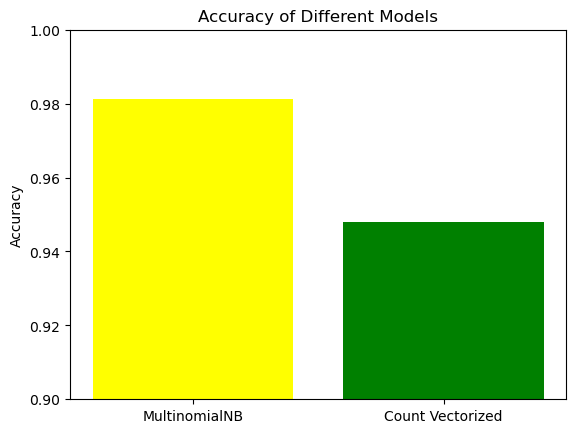

In [192]:
import matplotlib.pyplot as plt

# Model names for the bar chart
models = ['MultinomialNB', 'Count Vectorized']

# Accuracy values for the bar chart
accuracies = [accuracy_model, accuracy_count]

# Plotting the bar chart
plt.bar(models, accuracies, color=['yellow', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.9, 1.0)  # Set y-axis limits for better visualization
plt.show()

In [222]:
# Train a Multinomial Naive Bayes classifier on TF-IDF Vectorized data
classifier_MU = MultinomialNB()
classifier_MU.fit(X_train_tfidf_vectorized, y_train)

# Make predictions on the test set (TF-IDF Vectorized)
predictions_MU = classifier_MU.predict(X_test_tfidf_vectorized)


# Evaluate the accuracy (TF-IDF Vectorized)
accuracy_MU = accuracy_score(y_test, predictions_MU)
print("Accuracy (TF-IDF Vectorized):", accuracy_MU)

Accuracy (TF-IDF Vectorized): 0.9641255605381166


In [195]:
# Train a  ComplementNB Naive Bayes classifier on TF-IDF Vectorized data
classifier_tfidf = ComplementNB()
classifier_tfidf.fit(X_train_tfidf_vectorized, y_train)

# Make predictions on the test set (TF-IDF Vectorized)
predictions_tfidf = classifier_tfidf.predict(X_test_tfidf_vectorized)
# Evaluate the accuracy (TF-IDF Vectorized)
accuracy_tfidf = accuracy_score(y_test, predictions_tfidf)
print("Accuracy (TF-IDF Vectorized):", accuracy_tfidf)

Accuracy (TF-IDF Vectorized): 0.9479820627802691


In [132]:

# Input a new email
new_email =input("Enter the email or SmS: ")
# Preprocess the new email
preprocessed_email = preprocess(new_email)

vectorized_email = tfidf_vectorizer.transform([preprocessed_email])

prediction = classifier_count.predict(vectorized_email)

# Display the prediction
print("Predicted Class:", prediction[0])

Predicted Class: ham


In [133]:
y_pred = classifier_count.predict(X_test_tfidf_vectorized)

In [134]:
y_test == y_pred


3246     True
945      True
1045     True
2485     True
813     False
        ...  
4265     True
2440     True
5557     True
4206     True
4294    False
Name: sit, Length: 1115, dtype: bool

In [135]:

# Global average of right predictions
import numpy as np
np.mean(y_test == y_pred)

0.9417040358744395

In [136]:
accuracy_score(y_test, y_pred)

0.9417040358744395

In [137]:

# Basic confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[910,  56],
       [  9, 140]])

In [138]:
from sklearn.preprocessing import LabelEncoder
lb_encod = LabelEncoder()
y = lb_encod.fit_transform(df['correct'])
y[:5]
     

array([ 834, 4738,  774, 3177, 2164])

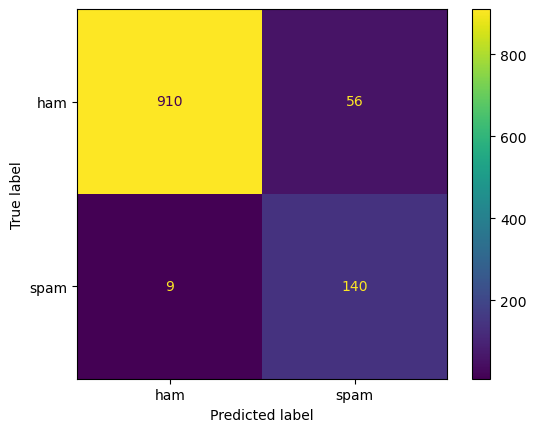

In [139]:

from sklearn.metrics import ConfusionMatrixDisplay
cm_plot = ConfusionMatrixDisplay(confusion_matrix,
                                display_labels=classifier_count.classes_)

cm_plot.plot()

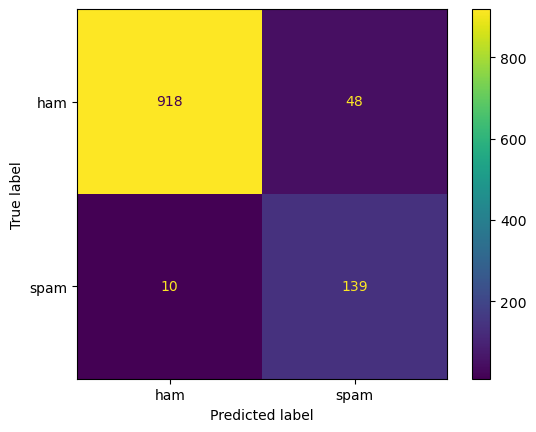

In [140]:

# Equivalent 
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = classifier_count,
                                      X = X_test_count_vectorized,
                                      y = y_test,
                                      display_labels=classifier_count.classes_)

In [141]:

# counts the number of true positives (y_test = 1, y_pred = 1)
TP = sum((y_test == 'spam') & (y_pred == 'spam'))
print (TP)

140


In [142]:
# counts the number of true negatives (y_test = 0, y_pred = 0)
TN = sum((y_test == 'ham') & (y_pred == 'ham'))
TN

910

In [143]:

# counts the number of false negatives (y_test = 1, y_pred = 0)
FN = sum((y_test == 'spam') & (y_pred == 'ham'))
FN
     

9

In [144]:

# counts the number of false positives (y_test = 0, y_pred = 1)
FP = sum((y_test == 'ham') & (y_pred == 'spam'))
FP
     

56

In [145]:
precision = TP / (TP + FP)
precision

0.7142857142857143

In [146]:
recall = TP / (TP + FN)
recall

0.9395973154362416

In [220]:
y_pred = classifier_tfidf.predict(X_test_tfidf_vectorized)

In [225]:
from sklearn.preprocessing import LabelEncoder


# Assuming y_true contains string labels ('ham' and 'spam')
label_encoder = LabelEncoder()
y_true_binary = label_encoder.fit_transform(y_test)
# Assuming y_pred contains  predicted labels (strings)
y_pred_numeric = label_encoder.fit_transform(y_pred)


In [216]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_true_binary, y_pred_numeric )

print("False positive rate:", fpr)
print("True positive rate:", tpr)
print("Thresholds:", thresholds)


False positive rate: [0.        0.0010352 1.       ]
True positive rate: [0.         0.73825503 1.        ]
Thresholds: [inf  1.  0.]


In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_true_binary, y_pred_numeric )

print("False positive rate:", fpr)
print("True positive rate:", tpr)
print("Thresholds:", thresholds)


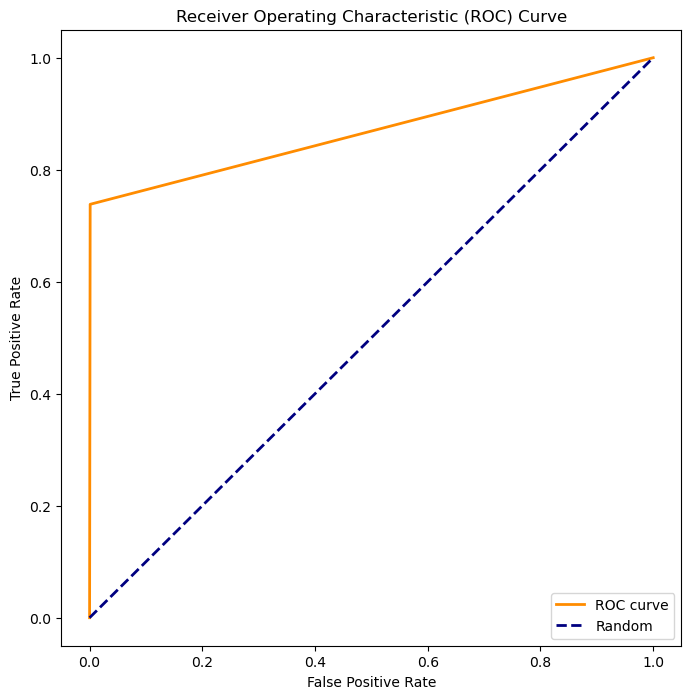

In [165]:
import matplotlib.pyplot as plt
# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [168]:
from sklearn.metrics import f1_score
f1_scores = f1_score(y_true_binary, y_pred_numeric , average='macro')

In [171]:
import numpy as np
from sklearn.metrics import recall_score
recall_scores = recall_score(y_true_binary, y_pred_numeric, average='macro')

In [152]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [158]:

pipe = Pipeline([
    ('tfidfvectorizer', TfidfVectorizer()),
    ('ComplementNB', ComplementNB())
])

param_grid = {
    'ComplementNB__alpha': [0.1, 0.5, 1.0]
}


In [159]:
# Fit the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('ComplementNB', ComplementNB())])

In [160]:
# Declare the Grid Search method
grid = GridSearchCV(pipe,param_grid,scoring='accuracy' , cv=5, n_jobs=-1 )

In [161]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('ComplementNB', ComplementNB())]),
             n_jobs=-1, param_grid={'ComplementNB__alpha': [0.1, 0.5, 1.0]},
             scoring='accuracy')

In [162]:

# Evaluate cross-validation performance
print("CV score - Accuracy:", grid.best_score_)

CV score - Accuracy: 0.9490686637173932


In [163]:


# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Test score - Accuracy:", accuracy)


Test score - Accuracy: 0.9641255605381166
